In [87]:
# For data extraction from youtube ie getting comments from youtube
from youtube_comment_scraper_python import *
import pandas as pd

link = input("Input links:")
saved = input("Output name:")
youtube.open(link)

response = youtube.video_comments()
all_data = []
for i in range(0, 5): # It will scroll 10 times
    response = youtube.video_comments()
    data = response['body']
    all_data.extend(data)
df = pd.DataFrame(data)
df.to_csv(saved)

Starting DataKund...
Input links:https://www.youtube.com/watch?v=k6rc4CS1TTA
Output name:argentinavscroatia.csv


Progress:  66%|█████████████████████████████████████████████                       | 132.6/200 [00:28<00:19,  3.47it/s]
Progress:   0%|                                                                                | 0/200 [00:00<?, ?it/s]
Progress:  92%|██████████████████████████████████████████████████████████████▋     | 184.2/200 [00:38<00:03,  4.57it/s]
Progress: 100%|███████████████████████████████████████████████████████████████████▊| 199.6/200 [00:40<00:00,  5.06it/s]
Progress: 225.2it [00:42,  6.46it/s]                                                                                   
Progress: 231.8it [00:44,  5.76it/s]███████████████▌                               | 107.6/200 [00:12<00:11,  7.80it/s]
Progress: 236.8it [00:46,  4.97it/s]█████████████████▎                             | 112.6/200 [00:14<00:14,  6.13it/s]
Progress: 241.8it [00:48,  4.31it/s]██████████████████▉                            | 117.6/200 [00:16<00:16,  4.97it/s]
Progress: 248.4it [00:50,  4.03it/s]████

Progress: 275.6it [01:41,  1.70it/s]             
Progress: 656.1999999999999it [03:17,  1.74it/s]



Progress:  70%|███████████████████████████████████████████████▍                    | 139.4/200 [00:51<00:34,  1.78it/s]

Progress: 410.9999999999999it [02:19,  1.70it/s] 


Progress: 278.80000000000007it [01:43,  1.66it/s]
Progress: 659.5999999999999it [03:19,  1.72it/s]



Progress:  71%|████████████████████████████████████████████████▌                   | 142.8/200 [00:53<00:32,  1.74it/s]

Progress: 414.39999999999986it [02:22,  1.68it/s]


Progress: 282.20000000000005it [01:45,  1.65it/s]
Progress: 662.9999999999999it [03:21,  1.70it/s]



Progress:  73%|█████████████████████████████████████████████████▋                  | 146.2/200 [00:55<00:31,  1.71it/s]

Progress: 417.79999999999984it [02:24,  1.67it/s]


Progress: 286.6it [01:47,  1.80it/s]             
Progress: 666.1999999999999it [03:23,  1.66it/s]



Progress:  75%|██████████████████████████████████████████████████▊       

In [178]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [179]:
data = pd.read_csv('twicewhatislove.csv')
data.columns
data1=data.drop(['Unnamed: 0','Likes','Time','user'],axis=1)
data1

,Comment
0,"Nayeon - ""The Princess Diaries"".Momo - ""Lalala..."
1,언니들 너무 귀여워요️️
2,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴Mmm 사랑을 배워내 일...
3,Ayudemos a TWICE a llegar a 1B
4,Até o final de 2023 espero que esse mv tenha m...
...,...
95,if every once would stream this at least once ...
96,List of movie references I got so far:\n0:31 -...
97,So happy to see TWICE being happy
98,Memories I remember the excitement i had duri...


In [180]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["Comment"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["Comment"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["Comment"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["Comment"]]
score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1["Sentiment"] = sentiment
data1.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,Positive,Negative,Neutral,Compound,Sentiment
0,"Nayeon - ""The Princess Diaries"".Momo - ""Lalala...",0.167,0.0,0.833,0.6369,Positive
1,언니들 너무 귀여워요️️,0.000,0.0,1.000,0.0000,Neutral
2,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴Mmm 사랑을 배워내 일...,0.104,0.0,0.896,0.9825,Positive
3,Ayudemos a TWICE a llegar a 1B,0.000,0.0,1.000,0.0000,Neutral
4,Até o final de 2023 espero que esse mv tenha m...,0.000,0.0,1.000,0.0000,Neutral


In [181]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,Comment,Sentiment
0,"Nayeon - ""The Princess Diaries"".Momo - ""Lalala...",Positive
1,언니들 너무 귀여워요️️,Neutral
2,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴Mmm 사랑을 배워내 일...,Positive
3,Ayudemos a TWICE a llegar a 1B,Neutral
4,Até o final de 2023 espero que esse mv tenha m...,Neutral


In [182]:
# For removing stopwords ie most used words like in ,an ,the, on etc 
nltk.download('stopwords')
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
# For text processing like removing special characters ,removing new line characters,converting from uppercase to lower case
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [184]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
data_copy = data2.copy()
data_copy.Comment = data_copy.Comment.apply(lambda text: text_processing(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [185]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [186]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,nayeon princess diariesmomo lalalandsana pulp ...,2
1,언니들 너무 귀여워요,1
2,매일같이 영화 속에서나책 속에서나 드라마 속에서 사랑을 느껴mmm 사랑을 배워내 일...,2
3,ayudemos twice llegar 1b,1
4,até final de 2023 espero que esse mv tenha mai...,1


In [187]:
processed_data['Sentiment'].value_counts()

1    58
2    36
0     6
Name: Sentiment, dtype: int64

In [228]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 100, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 100, 
                                 random_state=42) 
df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 100, 
                                 random_state=42) 


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive_upsampled])

In [229]:
final_data['Sentiment'].value_counts()

0    100
1    100
2    100
Name: Sentiment, dtype: int64

In [230]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['este mv tiene que tener 700m de vista 1m de comentarios comentemos 12 veces sin emojis cuando veamos este mv si comentamos muchas veces youtube lo tomará como spam eliminara tu vista',
 'realmente este e un mv la chicas se merecen los 700m se supone que si son onces le gusta la música de twice deberían hacer stream la chicas se esforzaron para darnos este arte lo valora',
 'también ayuda mucho los comentarios así se le demuestra youtube que el vídeo sigue siendo actual lo recomendará más persona así que mientras manden copy se reduzca el uso de emojis hay que hacerlo',
 'realmente este e un mv la chicas se merecen los 700m se supone que si son onces le gusta la música de twice deberían hacer stream la chicas se esforzaron para darnos este arte lo valora',
 'realmente este e un mv la chicas se merecen los 700m se supone que si son onces le gusta la música de twice deberían hacer stream la chicas se esforzaron para darnos este arte lo valora']

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [232]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0],
       [ 3, 26,  0],
       [ 0,  6, 28]], dtype=int64)

In [234]:
nb_score = accuracy_score(y_test, y_pred)
print('Accuracy',nb_score*100)

Accuracy 90.0


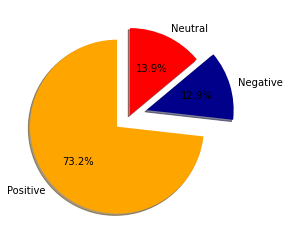

In [235]:

 mylabels=["Positive","Negative","Neutral"]
x=[205,36,39]
labels = list(mylabels)
myexplode = [0.2, 0.2, 0]
colors = ['orange',  'darkblue', 'red']
plt.pie(x,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

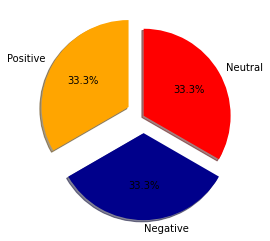

In [111]:
mylabels=["Positive","Negative","Neutral"]
x=[205,205,205]
labels = list(mylabels)
myexplode = [0.2, 0.2, 0]
colors = ['orange',  'darkblue', 'red']
plt.pie(x,labels=labels,colors=colors,explode=myexplode,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()